## Data Import

In [26]:
import numpy as np
import pandas as pd

import os
os.getcwd()

import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# reading the dataset
data = pd.read_sas('zipall_1113.sas7bdat')

# checking the shape of the data
data.shape

(169, 251)

In [5]:
data.head()

,zip,birthtot,age1tot,age2tot,age3tot,age4tot,age5tot,age6tot,age7tot,age8tot,...,bwt1ctot_ed3,bwt2ctot_ed3,ga1ctot_ed3,ga2ctot_ed3,plur1tot_ed3,plur2tot_ed3,bf1tot_ed3,bf2tot_ed3,sex1tot_ed3,sex2tot_ed3
0,10001.0,524.0,NaN,7.0,7.0,30.0,85.0,181.0,157.0,48.0,...,48.0,386.0,42.0,392.0,410.0,24.0,224.0,204.0,214.0,220.0
1,10002.0,3305.0,NaN,20.0,83.0,577.0,1054.0,859.0,561.0,142.0,...,98.0,1164.0,103.0,1158.0,1217.0,45.0,518.0,744.0,669.0,593.0
2,10003.0,1273.0,NaN,NaN,NaN,24.0,117.0,532.0,429.0,157.0,...,110.0,1086.0,102.0,1094.0,1116.0,80.0,701.0,487.0,609.0,587.0
3,10005.0,324.0,NaN,NaN,NaN,NaN,45.0,157.0,94.0,24.0,...,19.0,299.0,20.0,298.0,306.0,12.0,183.0,132.0,173.0,145.0
4,10007.0,502.0,NaN,NaN,NaN,NaN,40.0,228.0,177.0,49.0,...,35.0,457.0,35.0,457.0,460.0,32.0,260.0,222.0,274.0,218.0


## Data Pre-processing

In [93]:
# Convert zip_code to object
data['zip'] = data['zip'].astype('object')

## Infant Health and Mothers Education Level 

In [94]:
by_edu = data[["zip","edlev1tot", "edlev2tot", "edlev3tot", "edlev4tot", "edlev5tot", "apg1tot"]]
by_edu = pd.melt(by_edu, 
                 id_vars=['zip', 'apg1tot'], 
                 value_vars=["edlev1tot", "edlev2tot", "edlev3tot", "edlev4tot", "edlev5tot"],
                 var_name='education_level', value_name='edu_count')

In [96]:
by_edu.head()

,zip,apg1tot,education_level,edu_count
0,10001,8.0,edlev1tot,40.0
1,10002,10.0,edlev1tot,1264.0
2,10003,6.0,edlev1tot,36.0
3,10005,NaN,edlev1tot,NaN
4,10007,NaN,edlev1tot,NaN


### Scatterplot

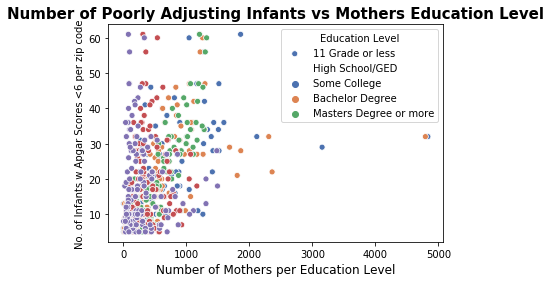

In [95]:
ax = sns.scatterplot(x="edu_count", y="apg1tot",
                     hue="education_level", data=by_edu, palette = 'deep')
plt.legend(title='Education Level', loc='upper right', labels=['11 Grade or less', 'High School/GED', 'Some College', 'Bachelor Degree', 'Masters Degree or more'])
plt.title('Number of Poorly Adjusting Infants vs Mothers Education Level',size = 15, weight = 'bold')
plt.ylabel('No. of Infants w Apgar Scores <6 per zip code')
plt.xlabel('Number of Mothers per Education Level', size=12);

### lmplot with counts

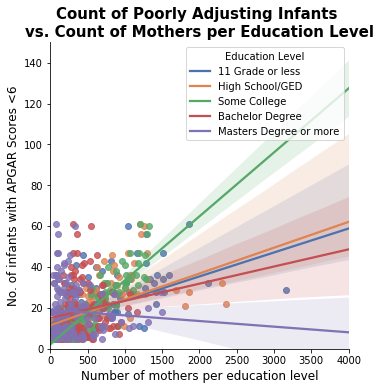

In [97]:
ax = sns.lmplot(x="edu_count", y="apg1tot",
                     hue="education_level", data=by_edu, palette = 'deep', legend = False)
ax.set(xlim=(0,4000),ylim=(0,150))
plt.title('Count of Poorly Adjusting Infants \nvs. Count of Mothers per Education Level',size = 15, weight = 'bold')
plt.ylabel('No. of infants with APGAR Scores <6', size = 12)
plt.xlabel('Number of mothers per education level', size=12);
plt.legend(title='Education Level', loc='upper right', labels=['11 Grade or less', 'High School/GED', 'Some College', 'Bachelor Degree', 'Masters Degree or more'])

### lmplot with proportions

In [106]:
data['apg1_prop'] = data['apg1tot']/data['birthtot']*1000
data['edlev1_prop'] = data['edlev1tot']/data['birthtot']*1000
data['edlev2_prop'] = data['edlev2tot']/data['birthtot']*1000
data['edlev3_prop'] = data['edlev3tot']/data['birthtot']*1000
data['edlev4_prop'] = data['edlev4tot']/data['birthtot']*1000
data['edlev5_prop'] = data['edlev5tot']/data['birthtot']*1000
by_edu_prop = data[["zip","edlev1_prop", "edlev2_prop", "edlev3_prop", "edlev4_prop", "edlev5_prop", "apg1_prop"]]
by_edu_prop = pd.melt(by_edu_prop, 
                 id_vars=['zip', 'apg1_prop'], 
                 value_vars=["edlev1_prop", "edlev2_prop", "edlev3_prop", "edlev4_prop", "edlev5_prop"],
                 var_name='education_level', value_name='edu_prop')

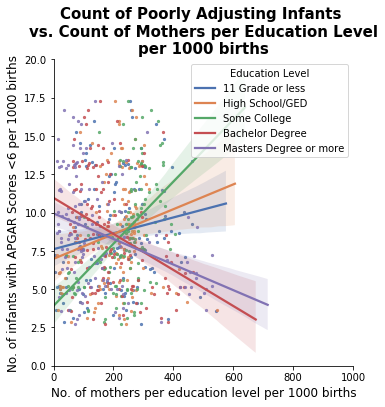

In [120]:
#Education level Proportions
ax = sns.lmplot(x="edu_prop", 
                y="apg1_prop",
                hue="education_level",
                scatter_kws={"s": 5},
                data=by_edu_prop, palette = 'deep', legend = False)
ax.set(xlim=(0,1000),ylim=(0,20))
plt.title('Count of Poorly Adjusting Infants \nvs. Count of Mothers per Education Level\nper 1000 births',size = 15, weight = 'bold')
plt.ylabel('No. of infants with APGAR Scores <6 per 1000 births', size = 12)
plt.xlabel('No. of mothers per education level per 1000 births', size=12);
plt.legend(title='Education Level', loc='upper right', labels=['11 Grade or less', 'High School/GED', 'Some College', 'Bachelor Degree', 'Masters Degree or more'])

## Infant Health and Method of Delivery

In [111]:
by_method = data[["zip","mth1tot", "mth2tot", "mth3tot", "mth4tot", "apg1tot"]]
by_method = pd.melt(by_method, 
                 id_vars=['zip', "apg1tot"], 
                 value_vars=["mth1tot", "mth2tot", "mth3tot", "mth4tot"],
                 var_name='delivery_method', value_name='method_count')


### lmplot with counts

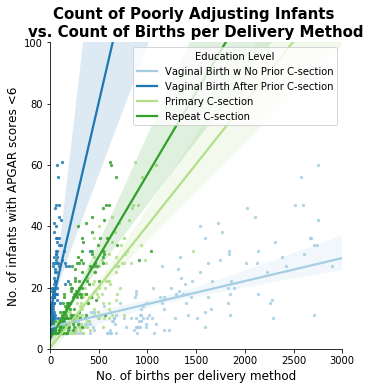

In [117]:
ax = sns.lmplot(x="method_count", 
                y="apg1tot",
                hue="delivery_method", 
                data=by_method,
                scatter_kws={"s": 5},
                palette = 'Paired',
                legend=False)
ax.set(xlim=(0,3000),ylim=(0,100))
plt.title('Count of Poorly Adjusting Infants \nvs. Count of Births per Delivery Method',size = 15, weight = 'bold')
plt.ylabel('No. of infants with APGAR scores <6', size = 12)
plt.xlabel('No. of births per delivery method', size=12);
plt.legend(title='Education Level', loc='upper right', labels=['Vaginal Birth w No Prior C-section', 'Vaginal Birth After Prior C-section', 'Primary C-section', 'Repeat C-section'])

In [ ]:
ax = sns.scatterplot(x="method_count", y="apg1tot",
                     hue="delivery_method", data=by_method)

### lmplot with proportions 

In [109]:
data['mth1_prop'] = data['mth1tot']/data['birthtot']*1000
data['mth2_prop'] = data['mth2tot']/data['birthtot']*1000
data['mth3_prop'] = data['mth3tot']/data['birthtot']*1000
data['mth4_prop'] = data['mth4tot']/data['birthtot']*1000
by_method_prop = data[["zip","mth1_prop", "mth2_prop", "mth3_prop", "mth4_prop", "apg1_prop"]]
by_method_prop = pd.melt(by_method_prop, 
                 id_vars=['zip', 'apg1_prop'], 
                 value_vars=["mth1_prop", "mth2_prop", "mth3_prop", "mth4_prop"],
                 var_name='delivery_method', value_name='method_prop')

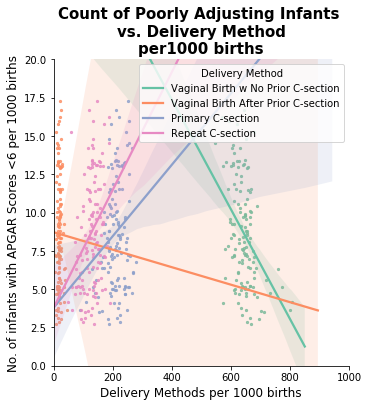

In [126]:
#Delivery Method Proportions
ax = sns.lmplot(x="method_prop", 
                y="apg1_prop",
                hue="delivery_method",
                scatter_kws={"s": 5},
                data=by_method_prop, palette = 'Set2', legend = False)
ax.set(xlim=(0,1000),ylim=(0,20))
plt.title('Count of Poorly Adjusting Infants \nvs. Delivery Method\nper1000 births',size = 15, weight = 'bold')
plt.ylabel('No. of infants with APGAR Scores <6 per 1000 births', size = 12)
plt.xlabel('Delivery Methods per 1000 births', size=12);
plt.legend(title='Delivery Method', loc='upper right', labels=['Vaginal Birth w No Prior C-section', 'Vaginal Birth After Prior C-section', 'Primary C-section', 'Repeat C-section'])